In [126]:
#BMI WORKFLOWS

In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [128]:
#Define state

class BMIState(TypedDict, total=False):  
    weight_kg: float
    height_m: float
    bmi: float
    label: str
    camed:bool
    

In [129]:
def calculateBmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    state['camed'] = False
    
    if 'label' in state and state['label'] and len(state['label']) > 1:
        state['camed'] = True

    return state


In [130]:
def labelBmi(state:BMIState)->BMIState:
    if state['bmi']>22:
        state['label']='He is good'
    else:
        state['label']='He is not good'
    return state


In [ ]:
#Define your graph
graph = StateGraph(BMIState)
graph.add_node('caclulate_bmi',calculateBmi)
graph.add_node('label_bmi',labelBmi)


In [132]:
graph.add_edge(START,'caclulate_bmi')
graph.add_edge('caclulate_bmi','label_bmi')
graph.add_edge('label_bmi','caclulate_bmi')
graph.add_edge('caclulate_bmi',END,)

workflow = graph.compile()


In [134]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


class BMIState(TypedDict, total=False):
    weight_kg: float
    height_m: float
    bmi: float
    label: str
    camed: bool


def calculateBmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    state['camed'] = False
    if 'label' in state and state['label'] and len(state['label']) > 1:
        state['camed'] = True

    print(f"[calculateBmi] state: {state}")
    return state


def labelBmi(state: BMIState) -> BMIState:
    if state['bmi'] > 22:
        state['label'] = 'He is good'
    else:
        state['label'] = 'He is not good'

    print(f"[labelBmi] state: {state}")
    return state


def should_recalculate(state: BMIState) -> str:
    return "recalculate" if not state.get("camed", False) else "end"


graph = StateGraph(BMIState)

graph.add_node("calculate_bmi", calculateBmi)
graph.add_node("label_bmi", labelBmi)


graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")


graph.add_conditional_edges(
    "label_bmi",
    should_recalculate,
    {
        "recalculate": "calculate_bmi",
        "end": END
    }
)

workflow = graph.compile()

result = workflow.invoke({'weight_kg': 60.3, 'height_m': 1.557})
print("\nFinal Result:")
print(result)


[calculateBmi] state: {'weight_kg': 60.3, 'height_m': 1.557, 'bmi': 24.87, 'camed': False}
[labelBmi] state: {'weight_kg': 60.3, 'height_m': 1.557, 'bmi': 24.87, 'camed': False, 'label': 'He is good'}
[calculateBmi] state: {'weight_kg': 60.3, 'height_m': 1.557, 'bmi': 24.87, 'label': 'He is good', 'camed': True}
[labelBmi] state: {'weight_kg': 60.3, 'height_m': 1.557, 'bmi': 24.87, 'label': 'He is good', 'camed': True}

Final Result:
{'weight_kg': 60.3, 'height_m': 1.557, 'bmi': 24.87, 'label': 'He is good', 'camed': True}


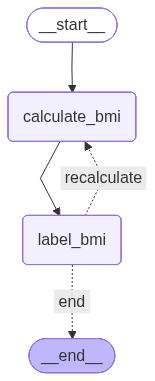

In [ ]:

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [139]:
!pip install langchain_google_genai

  Using cached langchain_google_genai-2.1.10-py3-none-any.whl.metadata (7.2 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
  Using cached google_api_core-2.25.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl.metadata (6.2 kB)
  Using cached proto_plus-1.26.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-6.32.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached grpcio-1.74.0-cp313-cp313-win_amd64.whl.metadata (4.0 kB)
  Using cached grpcio_status-1.74.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyasn1_modules-0.4.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metad

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.
